In [116]:
from rdkit import Chem
import pandas as pd
import numpy as np
from tqdm import tqdm

In [37]:
example = Chem.MolFromSmiles('Cc1nccnc1C ')

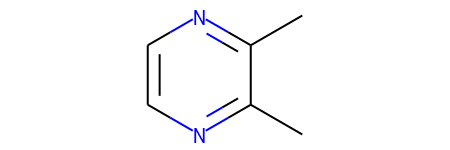

In [38]:
example

In [147]:
df=pd.read_csv("names_smiles1.csv")

In [148]:
df.head()

,NCGC00260230-01,F[P-](F)(F)(F)(F)F.CCCC[N+]1=CC=CC(C)=C1
0,NCGC00184995-01,[H][C@@]12CC[C@H](OP(O)(O)=O)[C@@]1(C)CC[C@]3(...
1,NCGC00260471-01,[O-][N+](=O)C1=CC=C2NN=CC2=C1
2,NCGC00256746-01,CCC1=NC=CN=C1C
3,NCGC00183024-01,CCCN(CCC)C(=O)C(CCC(=O)OCCCN1CCN(CCOC(=O)CC2=C...
4,NCGC00159390-02,CC1(C)C(C=C(Cl)Cl)C1C(=O)OCC2=CC(OC3=CC=CC=C3)...


In [149]:
x=df.iloc[:,-1]

In [150]:
x.head()

0    [H][C@@]12CC[C@H](OP(O)(O)=O)[C@@]1(C)CC[C@]3(...
1                        [O-][N+](=O)C1=CC=C2NN=CC2=C1
2                                       CCC1=NC=CN=C1C
3    CCCN(CCC)C(=O)C(CCC(=O)OCCCN1CCN(CCOC(=O)CC2=C...
4    CC1(C)C(C=C(Cl)Cl)C1C(=O)OCC2=CC(OC3=CC=CC=C3)...
Name: F[P-](F)(F)(F)(F)F.CCCC[N+]1=CC=CC(C)=C1, dtype: object

In [151]:
max=x[0]
for i in range(len(x)):
    if(len(max)<=len(x[i])):
        
        max=x[i]
    

In [152]:
len(x)

7691

In [153]:
SMILES_CHARS = [' ',
                  '#', '%', '(', ')', '+', '-', '.', '/',
                  '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                  '=', '@',
                  'A', 'B', 'C', 'F', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P',
                  'R', 'S', 'T', 'V', 'X', 'Z','G','D','Y',
                  '[', '\\', ']',
                  'a', 'b', 'c', 'e', 'g', 'i', 'l', 'n', 'o', 'p', 'r', 's',
                  't', 'u','d','y']
smi2index = dict( (c,i) for i,c in enumerate( SMILES_CHARS ) )
index2smi = dict( (i,c) for i,c in enumerate( SMILES_CHARS ) )
def smiles_encoder( smiles, maxlen=maxx ):
    smiles = Chem.MolToSmiles(Chem.MolFromSmiles( smiles )) #this makes the output same even if the structure is diffrent for same molecule
    X = np.zeros( ( maxlen, len( SMILES_CHARS ) ) )
    for i, c in enumerate( smiles ):
        X[i, smi2index[c] ] = 1
    return X
 
def smiles_decoder( X ):
    smi = ''
    X = X.argmax( axis=-1 )
    for i in X:
        smi += index2smi[ i ]
    return smi

the above code source is https://github.com/maxhodak/keras-molecules/blob/master/molecules/vectorizer.py
here we have added 'y','G','D','Y

In [154]:
data_encoded=[]
for i in tqdm(range(len(x))):
    data_encoded.append(smiles_encoder(x[i]))


100%|████████████████████████████████████████████████████████████████████████████| 7691/7691 [00:06<00:00, 1238.40it/s]


In [169]:
TrainX =np.asarray(data_encoded)

In [242]:
TrainX.shape

(7691, 400, 61)

In [214]:
cf=pd.read_csv('names_labels.csv')

In [215]:
y=cf.iloc[:,-1].values

In [219]:
TrainY=y

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(TrainX, TrainY, test_size = 0.2, random_state = 7)

In [233]:
X_train.shape

(6152, 400, 61)

In [250]:
timesteps=400
features=61

In [244]:
xxx= y_train.reshape(6152,1)

In [249]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [252]:
model=Sequential()
model.add(LSTM(5,input_shape=(timesteps,features)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 5)                 1340      
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 1,346
Trainable params: 1,346
Non-trainable params: 0
_________________________________________________________________
None


In [256]:
model.fit(X_train, y_train, epochs=3, batch_size=64,verbose=2,validation_data=(X_val,y_val))

Train on 6152 samples, validate on 1539 samples
Epoch 1/3
 - 25s - loss: 0.3791 - acc: 0.8797 - val_loss: 0.3827 - val_acc: 0.8720
Epoch 2/3
 - 28s - loss: 0.3780 - acc: 0.8797 - val_loss: 0.3827 - val_acc: 0.8720
Epoch 3/3
 - 28s - loss: 0.3785 - acc: 0.8797 - val_loss: 0.3828 - val_acc: 0.8720
